#             Fundamentals of Biometric Identification-- Homework #2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize


In [3]:
A=np.loadtxt("C:/Users/varan/Downloads/Course_Materials_export/Homework #2/simMatrix1.txt")
B=np.loadtxt("C:/Users/varan/Downloads/Course_Materials_export/Homework #2/simMatrix2.txt")

Genuine and Imposter seperation

In [4]:
Gen_a=np.diag(A)
non_diag = np.ones(shape=A.shape, dtype=bool) ^ np.identity(len(A)).astype(bool)
Imp_a=A[non_diag==True]

In [5]:
max(Imp_a)

0.46525

In [6]:
Gen_b=np.diag(B)
non_diag = np.ones(shape=B.shape, dtype=bool) ^ np.identity(len(B)).astype(bool)
Imp_b=B[non_diag==True]

## PART I Identity System Evaluation 

#### a) Plot the genuine and impostor score distributions

System 1

Text(0.5, 0, 'Match Score')

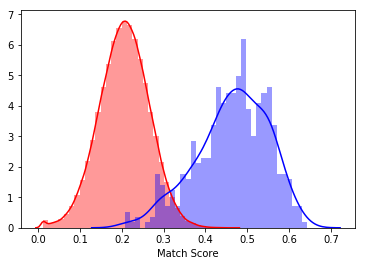

In [7]:
s1 = sns.distplot(Imp_a, kde=True, 
             bins=int(180/5), color = 'red')

s2 = sns.distplot(Gen_a, kde=True, 
             bins=int(180/5), color = 'blue')

plt.xlabel('Match Score')

System 2

Text(0.5, 0, 'Match Score')

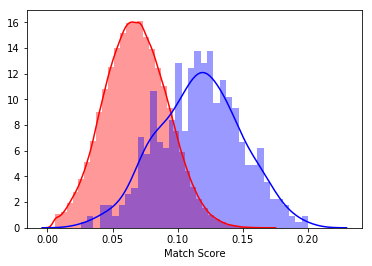

In [8]:
s1 = sns.distplot(Imp_b, hist=True, kde=True, 
             bins=int(180/5), color = 'red')

s2 = sns.distplot(Gen_b, hist=True, kde=True, 
             bins=int(180/5), color = 'blue')

plt.xlabel('Match Score')

#### b)Cumulative match charecteristics(CMC)

System 1

In [9]:
T=[]
P_a=[]
for t in range(0,466):
    T.append(t+1)
    temp=0
    for i in range(0,466):
        if i in A[i].argsort()[-(t+1):][::-1]:
            temp+=1
    p=temp/466
    P_a.append(p)
    

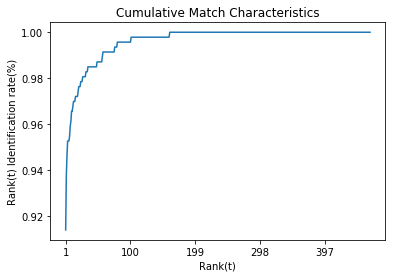

In [10]:
plt.plot(T,P_a)
plt.xlabel('Rank(t)')
plt.ylabel('Rank(t) Identification rate(%)')
plt.xticks(np.arange(1, 466, step=99))
plt.title('Cumulative Match Characteristics')
plt.show()

System 2

In [11]:
P_b=[]
for t in range(0,466):
    temp=0
    for i in range(0,466):
        if i in B[i].argsort()[-(t+1):][::-1]:
            temp+=1
    p=temp/466
    P_b.append(p)

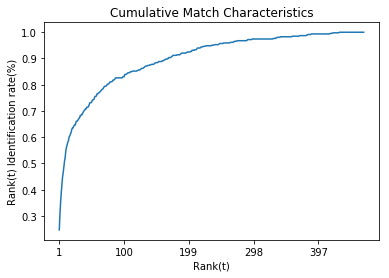

In [12]:
plt.plot(T,P_b)
plt.xlabel('Rank(t)')
plt.ylabel('Rank(t) Identification rate(%)')
plt.xticks(np.arange(1, 466, step=99))
plt.title('Cumulative Match Characteristics')
plt.show()

#### c)decidability index (d')

System 1

In [13]:
Gen_mean=np.mean(Gen_a)
Imp_mean=np.mean(Imp_a)
Gen_var=np.var(Gen_a)
Imp_var=np.var(Imp_a)

d_a = np.sqrt(2)*np.absolute(Gen_mean-Imp_mean)/np.sqrt(Gen_var+Imp_var)
print("d_a=",d_a)

d_a= 3.516470545146112


System 2

In [14]:
Gen_mean=np.mean(Gen_b)
Imp_mean=np.mean(Imp_b)
Gen_var=np.var(Gen_b)
Imp_var=np.var(Imp_b)

d_b = np.sqrt(2)*np.absolute(Gen_mean-Imp_mean)/np.sqrt(Gen_var+Imp_var)
print("d_b=",d_b)

d_b= 1.7116813276236182


#### d)lowest rank at which the system achieves performance greaterthan 70%

In [15]:
R_a=np.min(np.array(T)[np.array(P_a)>0.7])
R_b=np.min(np.array(T)[np.array(P_b)>0.7])
print("R_a=",R_a)
print("R_b=",R_b)

R_a= 1
R_b= 39



## PART 2 Verification System Evaluation




#### a)plot the Receiver Operating Curve (FAR vs. FRR)

System 1

Text(0.5, 1.0, 'ROC Curve')

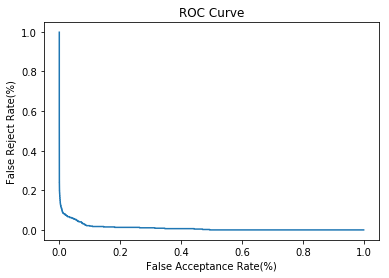

In [16]:
T_a=np.arange(np.min(Imp_a), np.max(Gen_a), 0.0001)
FAR=[]
FRR=[]
for t in T_a:
    far=len(Imp_a[Imp_a>t])/len(Imp_a)
    FAR.append(far)
    frr=len(Gen_a[Gen_a<t])/len(Gen_a)
    FRR.append(frr)
      
FAR_a=np.array(FAR)
FRR_a=np.array(FRR)

plt.plot(FAR_a,FRR_a)
plt.xlabel('False Acceptance Rate(%)')
plt.ylabel('False Reject Rate(%)')
plt.title('ROC Curve')

System 2

Text(0.5, 1.0, 'ROC Curve')

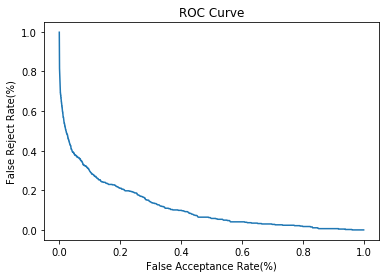

In [17]:
T_b=np.arange(np.min(Imp_b), np.max(Gen_b), 0.0001)
FAR=[]
FRR=[]
for t in T_b:
    far=len(Imp_b[Imp_b>t])/len(Imp_b)
    FAR.append(far)
    frr=len(Gen_b[Gen_b<t])/len(Gen_b)
    FRR.append(frr)
      
FAR_b=np.array(FAR)
FRR_b=np.array(FRR)

plt.plot(FAR_b,FRR_b)
plt.xlabel('False Acceptance Rate(%)')
plt.ylabel('False Reject Rate(%)')
plt.title('ROC Curve')

#### b)calculate the Equal Error Rate. At what operating point is this rate achieved for each system?


System 1

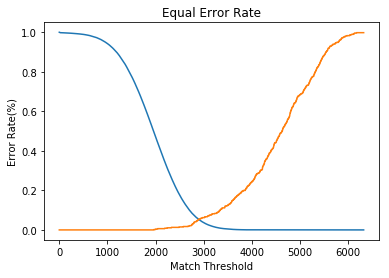

In [18]:
p1 = plt.plot(FAR_a)
p2 = plt.plot(FRR_a)
plt.xlabel('Match Threshold')
plt.ylabel('Error Rate(%)')
plt.title("Equal Error Rate")
plt.show()

In [19]:
IDX=np.argmin(np.absolute(FAR_a-FRR_a))
EER=FRR_a[IDX]
O_p=T_a[IDX]
print("Error_rate=",EER)
print("Operating_pt=",O_p)


Error_rate= 0.0536480686695279
Operating_pt= 0.29989099999999824


System 2

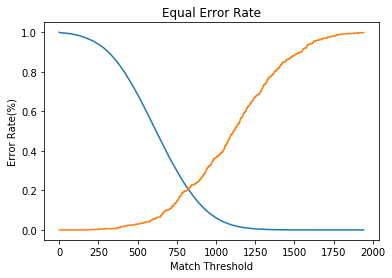

In [20]:
p1 = plt.plot(FAR_b)
p2 = plt.plot(FRR_b)
plt.xlabel('Match Threshold')
plt.ylabel('Error Rate(%)')
plt.title("Equal Error Rate")
plt.show()

In [21]:
IDX=np.argmin(np.absolute(FAR_b-FRR_b))
EER=FRR_b[IDX]
O_p=T_b[IDX]
print("Error_rate=",EER)
print("Operating_pt=",O_p)

Error_rate= 0.20600858369098712
Operating_pt= 0.08803700000000023


#### c)determine what the FRR

System 1

In [22]:
x=FRR_a[np.argmin(np.absolute(FAR_a-0.01))]
y=FRR_a[np.argmin(np.absolute(FAR_a-0.05))]
z=FRR_a[np.argmin(np.absolute(FAR_a-0.10))]
c=FRR_a[np.argmin(np.absolute(FAR_a-0.20))]
Tab_a=[[x*100,y*100,z*100,c*100],[1,5,10,20]]
pd.DataFrame(np.array(Tab_a).T, columns=["FRR(%)", "FAR(%)"])






,FRR(%),FAR(%)
0,9.442060,1.0
1,5.364807,5.0
2,2.145923,10.0
3,1.287554,20.0


System 2

In [23]:
x=FRR_b[np.argmin(np.absolute(FAR_b-0.01))]
y=FRR_b[np.argmin(np.absolute(FAR_b-0.05))]
z=FRR_b[np.argmin(np.absolute(FAR_b-0.10))]
c=FRR_b[np.argmin(np.absolute(FAR_b-0.20))]
Tab_b=[[x*100,y*100,z*100,c*100],[1,5,10,20]]
pd.DataFrame(np.array(Tab_b).T, columns=["FRR(%)", "FAR(%)"])


,FRR(%),FAR(%)
0,60.300429,1.0
1,38.197425,5.0
2,29.613734,10.0
3,21.030043,20.0


#### d)Which of the systems would you consider the best performing?

Performance metrics:
    A)Equal Error rate of system 1 is 5% and system 2 is 20%
    B)d' value of system 1 is 3.5 and system 2 is 1.7


System 1 is better performing than system 2 as Equal error rate is less and d' value is more 